In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./archive/DataCoSupplyChainDataset.csv')

In [3]:
df2 = pd.read_csv('./archive/tokenized_access_logs.csv')

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469977 entries, 0 to 469976
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Product     469977 non-null  object
 1   Category    469977 non-null  object
 2   Date        469977 non-null  object
 3   Month       469977 non-null  object
 4   Hour        469977 non-null  int64 
 5   Department  469977 non-null  object
 6   ip          469977 non-null  object
 7   url         469977 non-null  object
dtypes: int64(1), object(7)
memory usage: 28.7+ MB


In [5]:
df2.head()

,Product,Category,Date,Month,Hour,Department,ip,url
0,adidas Brazuca 2017 Official Match Ball,baseball & softball,9/1/2017 6:00,Sep,6,fitness,37.97.182.65,/department/fitness/category/baseball%20&%20so...
1,The North Face Women's Recon Backpack,hunting & shooting,9/1/2017 6:00,Sep,6,fan shop,206.56.112.1,/department/fan%20shop/category/hunting%20&%20...
2,adidas Kids' RG III Mid Football Cleat,featured shops,9/1/2017 6:00,Sep,6,apparel,215.143.180.0,/department/apparel/category/featured%20shops/...
3,Under Armour Men's Compression EV SL Slide,electronics,9/1/2017 6:00,Sep,6,footwear,206.56.112.1,/department/footwear/category/electronics/prod...
4,Pelican Sunstream 100 Kayak,water sports,9/1/2017 6:01,Sep,6,fan shop,136.108.56.242,/department/fan%20shop/category/water%20sports...


In [24]:
def initial_eda(df):
    # List of categorical columns
    cat_cols = df.select_dtypes('object').columns
    
    for col in cat_cols:
        # Formatting
        column_name = col.title().replace('_', ' ')
        title= 'Distribution of ' + column_name
        
        # Unique values <= 12 to avoid overcrowding
        if len(df[col].value_counts())<=12: 
            plt.figure(figsize = (8, 6))        
            sns.countplot(x=df[col], 
                          data=df, 
                          palette="Paired",
                          order = df[col].value_counts().index)
            plt.title(title, fontsize = 18, pad = 12)
            plt.xlabel(column_name, fontsize = 15)
            plt.xticks(rotation=20)
            plt.ylabel("Frequency",fontsize = 15)
            plt.show();
        else:
            print(f'{column_name} has {len(df[col].value_counts())} unique values. Alternative EDA should be considered.')
    return

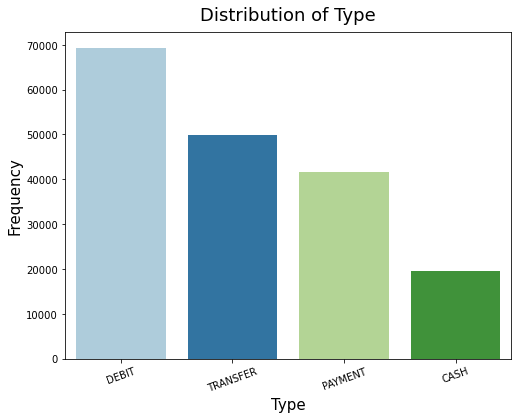

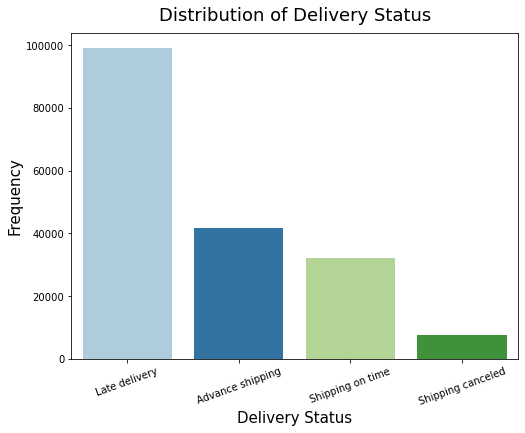

Category Name has 50 unique values. Alternative EDA should be considered.
Customer City has 563 unique values. Alternative EDA should be considered.


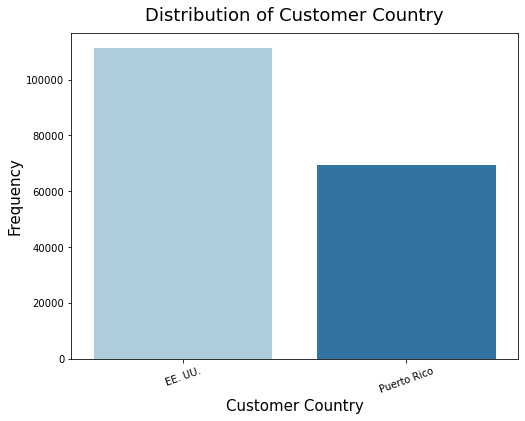

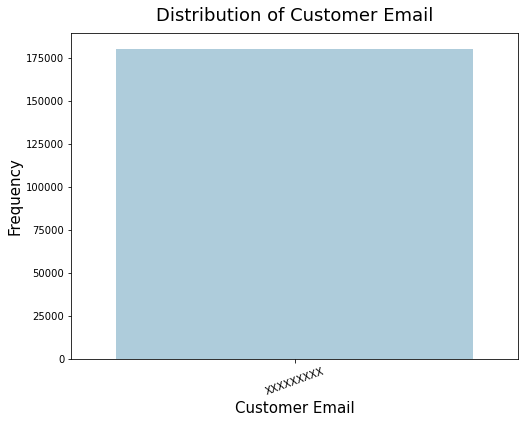

Customer Fname has 782 unique values. Alternative EDA should be considered.
Customer Lname has 1109 unique values. Alternative EDA should be considered.


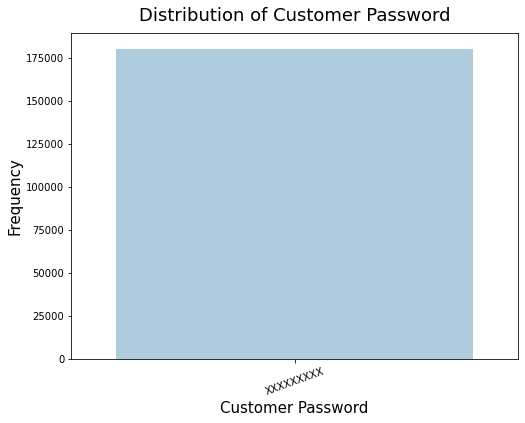

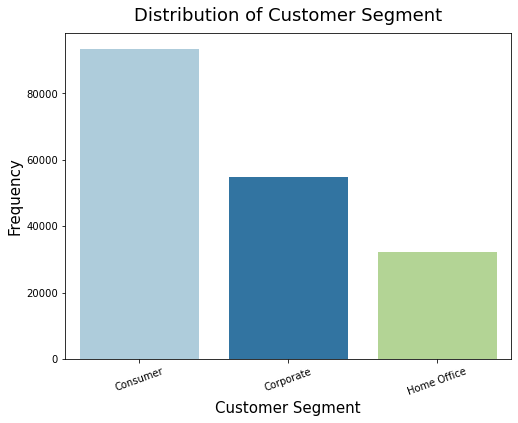

Customer State has 46 unique values. Alternative EDA should be considered.
Customer Street has 7458 unique values. Alternative EDA should be considered.


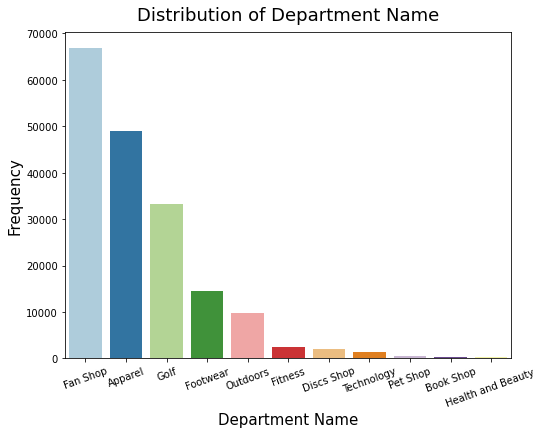

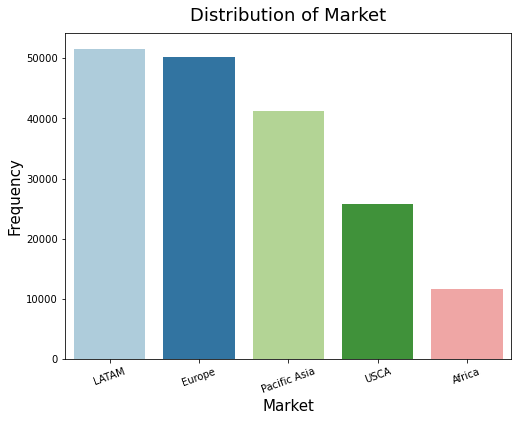

Order City has 3597 unique values. Alternative EDA should be considered.
Order Country has 164 unique values. Alternative EDA should be considered.
Order Date (Dateorders) has 65752 unique values. Alternative EDA should be considered.
Order Region has 23 unique values. Alternative EDA should be considered.
Order State has 1089 unique values. Alternative EDA should be considered.


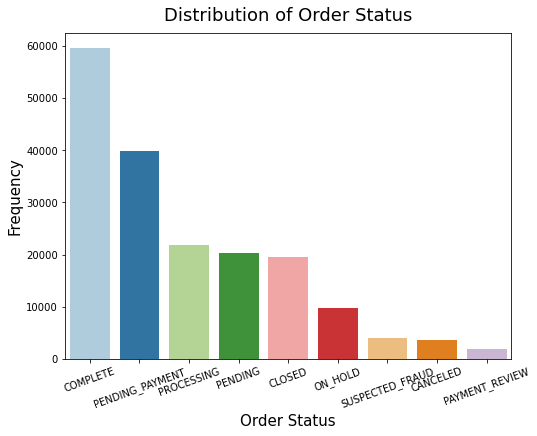

Product Image has 118 unique values. Alternative EDA should be considered.
Product Name has 118 unique values. Alternative EDA should be considered.
Shipping Date (Dateorders) has 63701 unique values. Alternative EDA should be considered.


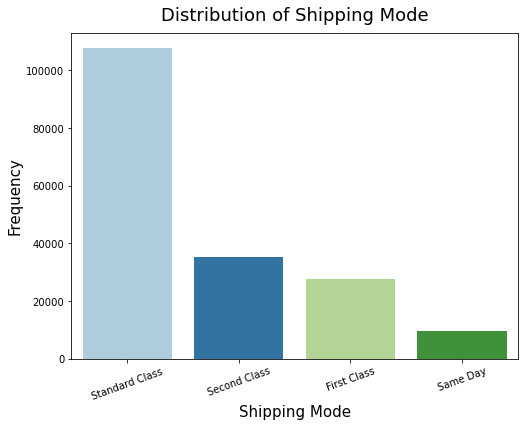

Ship Year has 63701 unique values. Alternative EDA should be considered.


In [25]:
initial_eda(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [7]:
df[['Customer Fname', 'Customer Lname', 'Sales per customer']].loc()

In [8]:
df['shipping date (DateOrders)']

0          2/3/2018 22:56
1         1/18/2018 12:27
2         1/17/2018 12:06
3         1/16/2018 11:45
4         1/15/2018 11:24
               ...       
180514     1/20/2016 3:40
180515     1/19/2016 1:34
180516    1/20/2016 21:00
180517    1/18/2016 20:18
180518    1/19/2016 18:54
Name: shipping date (DateOrders), Length: 180519, dtype: object

In [9]:
df['ship_year'] = df['shipping date (DateOrders)']

In [10]:
df['ship_year'].value_counts()

3/16/2016 3:14     10
10/9/2015 7:29     10
1/22/2017 7:21     10
7/5/2017 10:59     10
10/6/2016 16:58    10
                   ..
7/27/2016 6:23      1
11/27/2016 7:26     1
12/6/2017 9:32      1
11/14/2016 4:39     1
8/4/2015 17:07      1
Name: ship_year, Length: 63701, dtype: int64

In [11]:
df['Market'].value_counts()

LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: Market, dtype: int64

In [12]:
df['Shipping Mode'].value_counts()

Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: Shipping Mode, dtype: int64

In [13]:
df['Product Image']

0              http://images.acmesports.sports/Smart+watch 
1              http://images.acmesports.sports/Smart+watch 
2              http://images.acmesports.sports/Smart+watch 
3              http://images.acmesports.sports/Smart+watch 
4              http://images.acmesports.sports/Smart+watch 
                                ...                        
180514    http://images.acmesports.sports/Field+%26+Stre...
180515    http://images.acmesports.sports/Field+%26+Stre...
180516    http://images.acmesports.sports/Field+%26+Stre...
180517    http://images.acmesports.sports/Field+%26+Stre...
180518    http://images.acmesports.sports/Field+%26+Stre...
Name: Product Image, Length: 180519, dtype: object

In [14]:
df.shape

(180519, 54)

In [15]:
df['Sales'].max()

1999.98999

In [16]:
df['Product Category Id'].value_counts(normalize = True)

17    0.136002
18    0.123234
24    0.116525
46    0.106903
45    0.095973
48    0.086085
43    0.076053
9     0.069173
29    0.060847
37    0.011240
40    0.009860
36    0.008171
26    0.006653
13    0.006243
35    0.005927
41    0.005396
75    0.004642
63    0.003612
76    0.003601
3     0.003501
7     0.003401
62    0.003279
74    0.002930
33    0.002903
72    0.002725
68    0.002681
66    0.002681
67    0.002676
64    0.002448
32    0.002443
44    0.002437
71    0.002404
65    0.002388
12    0.002343
59    0.002244
38    0.002127
69    0.002005
73    0.001978
5     0.001900
6     0.001817
11    0.001712
30    0.001568
61    0.001501
70    0.001152
60    0.001147
31    0.001003
2     0.000764
10    0.000615
16    0.000377
4     0.000371
34    0.000338
Name: Product Category Id, dtype: float64

In [17]:
df['Category Name'].value_counts()

Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               838
Children's Clothing       652
Women's Clothing          650
Baseball & Softball       632
Hockey                    614
Cameras                   592
Toys                      529
Golf Shoes                524
Pet Supplies              492
Crafts                    484
Garden                    484
DVDs                      483
Computers                 442
Golf Apparel              441
Hunting & Shooting        440
Music                     434
Consumer Electronics      431
Boxing & MMA              423
Books     

In [18]:
df['Product Name'].value_counts()

Perfect Fitness Perfect Rip Deck                 24515
Nike Men's CJ Elite 2 TD Football Cleat          22246
Nike Men's Dri-FIT Victory Golf Polo             21035
O'Brien Men's Neoprene Life Vest                 19298
Field & Stream Sportsman 16 Gun Fire Safe        17325
                                                 ...  
Stiga Master Series ST3100 Competition Indoor       27
SOLE E35 Elliptical                                 15
Bushnell Pro X7 Jolt Slope Rangefinder              11
Bowflex SelectTech 1090 Dumbbells                   10
SOLE E25 Elliptical                                 10
Name: Product Name, Length: 118, dtype: int64

In [19]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0
